# 1. Newsgroup dataset

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. In this assignment we are going to use a **subset** of this dataset to learn a bit about unsupervised learning methods in machine learning.

# 2. Loading data and preprocessing

To ensure that your results are reproducable make sure to set the seed value.

In [44]:
import numpy as np
import pandas as pd
SEED = 123
np.random.seed(SEED)

## 2.1. downloading and loading data

You can download both training set and test set separately using sklearn apis. [Here](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) you can find sample codes for loading dataset.

In [45]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
# YOUR CODE HERE
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [46]:
df_train = pd.DataFrame.from_dict(newsgroups_train, orient='index')
df_train = df_train.transpose()
df_train.head()

data  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...   

                                           filenames  \
0  C:\Users\spandey8\scikit_learn_data\20news_hom...   
1  C:\Users\spandey8\scikit_learn_data\20news_hom...   
2  C:\Users\spandey8\scikit_learn_data\20news_hom...   
3  C:\Users\spandey8\scikit_learn_data\20news_hom...   
4  C:\Users\spandey8\scikit_learn_data\20news_hom...   

               target_names target DESCR  
0               alt.atheism      7     .  
1             comp.graphics      4     .  
2   comp.os.ms-windows.misc      4        
3  comp.sys.ibm.pc.hardware      1     _  
4     comp.sys.mac.hardware     14     2

In [47]:
df_test=pd.DataFrame.from_dict(newsgroups_test,orient='index')
df_test=df_test.transpose()
df_test.head()

data  \
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...   
1  From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...   
2  From: mathew <mathew@mantis.co.uk>\nSubject: R...   
3  From: bakken@cs.arizona.edu (Dave Bakken)\nSub...   
4  From: livesey@solntze.wpd.sgi.com (Jon Livesey...   

                                           filenames  \
0  C:\Users\spandey8\scikit_learn_data\20news_hom...   
1  C:\Users\spandey8\scikit_learn_data\20news_hom...   
2  C:\Users\spandey8\scikit_learn_data\20news_hom...   
3  C:\Users\spandey8\scikit_learn_data\20news_hom...   
4  C:\Users\spandey8\scikit_learn_data\20news_hom...   

               target_names target DESCR  
0               alt.atheism      7     .  
1             comp.graphics      5     .  
2   comp.os.ms-windows.misc      0        
3  comp.sys.ibm.pc.hardware     17     _  
4     comp.sys.mac.hardware     19     2

In [48]:
newsgroups_train=df_train

newsgroups_test=df_test

## 2.2 filtering target classes

Explore dataset and get familiar with it. Then, implement `filter_split_x_y` function which extracts `selected_targets` classes from data and splits the data into two lists of X and ys. Please don't change `selected_targets` list is this cell.


In [49]:
selected_targets = [1, 7, 10, 13, 15, 16, 17]

def filter_split_X_y(raw_data, selected_targets):
    """
    This function inputs a newsgroup dataset and filters it based on your selected labels
    then returns two lists of datapoints and labels separately
    
    """
    # YOUR CODE HERE
    # y=pd.DataFrame()
    # for i in selected_targets:
    #   y=pd.concat([y,raw_data[raw_data['target']==i]])
    # return y['data'],y['target']
    x=[]
    y=[]
    for i in range(len(raw_data.data)):
      if(raw_data.target[i] in selected_targets):
        x.append(raw_data.data[i])
        y.append(raw_data.target[i])
    return x,y

train_x, train_y = filter_split_X_y(newsgroups_train, selected_targets)
test_x, test_y = filter_split_X_y(newsgroups_test, selected_targets)

**2.2.1.** Print the name of classes in your training set along with `selected_targets` you can use `target_names` attribute of `newsgroups_train`. Make sure you include this output in your PDF report.

In [50]:
classes=list()
for i in range(len(newsgroups_train.data)):
  if(newsgroups_train.target[i] in selected_targets):
    classes.append(newsgroups_train.target_names[i])

print("classes: ",set(classes))
print("selected_targets: ",selected_targets)

classes:  {'alt.atheism', None, 'comp.sys.ibm.pc.hardware', 'talk.politics.mideast', 'comp.windows.x', 'talk.politics.guns', 'misc.forsale'}
selected_targets:  [1, 7, 10, 13, 15, 16, 17]


## 2.3. vectorizing documents

There are several ways that one can use to vectorize a whole document. In this programming assignment we are going to use **TF-IDF** method. Please go ahead and watch [this short video](https://www.youtube.com/watch?v=D2V1okCEsiE) to understand how tf-idf works and then answer the following questions.

**2.3.1.** What does TF-IDF stand for?<br>
**2.3.2.** Why don't we only use term frequency of the words in a document as its feature vector? what is the benefit of adding inverse document frequency?<br>
**2.3.3.** Calculate the tf-idf vectors of the following two documents, assuming this is the entire corpus:
!Documents (tfidf.png)


Now we are going to use scikit-learn to calculate the tf-idf vectors of each document in our twenty newgroups dataset. Write a function that accepts both `train_x` and `test_x` and returns the tf-idf vectors of them in numpy format.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_dataset(train_x, test_x):
    """
    returns vectorized numpy array of training and test set
    """
    vectorizer = TfidfVectorizer()
    # YOUR CODE HERE
    vectorizer.fit(train_x)
    x_train=vectorizer.transform(train_x).toarray()
    x_test=vectorizer.transform(test_x).toarray()
    return x_train,x_test
    
train_vec, test_vec = vectorize_dataset(train_x, test_x)
print(train_vec.shape, test_vec.shape)
# print(type(train_vec))

(4081, 56153) (2718, 56153)


In [52]:
#2.3.1
#TF stands for Term Frequency
#IDF stands for Inverse Document Frequency

In [53]:
#2.3.2
# We don't use only term freq, as it has drawbacks that cause it to assign low values to words that are relatively important.
# By adding inverse Document Frequency, to TF, will give us a Easy way to extract the most descriptive keywords in a document and Measures the uniqueness and relevance of your content, which ultimately improves the ranking of the documents in a corpus.

# 3. dimension reduction

In the previous section we built features vectors for each of the documents. However, these feature vectors are highly sparse and are not easy to cluster or visualize.

## 3.1. Sparsity

Answer these questions to understand the sparsity of these vectors:

**3.1.1** Count the number of non-zeros in each row of the `train_vec` matrix.<br>
**3.1.2** What is the average number non zero elements in each row? <br>
**3.1.3** On average what percentage of elements in each row have non-zero elements?<br>

In [54]:
count_nz = np.count_nonzero(train_vec)
count_nz

696063

In [55]:
average = count_nz/train_vec.shape[0]
average

170.56187209017398

In [56]:
percentage = average/train_vec.shape[1]
percentage*100

0.30374489713848585

## 3.2. SVD

Use `TruncatedSVD` module in scikit-learn to perform SVD on the dataset. Reduce your dimensions to 3 and perfomr SVD for 100 iterations (**note: the number of iterations parameter is a special component for an alternative way to solve SVD that we did not study in class. You do not need to know what it means**). Make sure to use the random seed given at the beginning of the notebook.

**Note: you should only fit your SVD/UMAP models on train data**

**3.2.1.** What portion of the variance in your dataset is explained by each of the SVD dimensions?

In [57]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

def fit_and_transform_svd(train_vec, test_vec):
    """
    trains a svd model and generate reduced dimension vectros from training and test dataset
    returns: 2 numpy arrays of size <number of documents>*3
    """
    # YOUR CODE
    X = csr_matrix(train_vec)
    Y = csr_matrix(test_vec)
    svd1 = TruncatedSVD(n_components=3, n_iter=100)
    svd1.fit(X)
    var_exp = svd1.explained_variance_ratio_
    r1 = svd1.transform(X)
    r2 = svd1.transform(Y)
    return r1,r2,var_exp
    
train_svd, test_svd, variance = fit_and_transform_svd(train_vec, test_vec)

In [58]:
#3.2.1
variance

array([0.01618638, 0.00617073, 0.00540306])

## 3.3 UMAP

UMAP is another dimensionality reduction method that works in a more complex way. [This video](https://www.youtube.com/watch?v=6BPl81wGGP8) explains on a high level how it performs dimension reduction.
Apply UMAP and get the embeddings for both training and test datasets. Use the previously given `random_state` and reduce dimensions to 3. Also use **cosine similarity** as the similarity metric of UMAP:

- n_components=3
- metric='cosine'
- random_state=SEED
- low_memory=True

In [59]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install umap-learn
!pip install -U ipykernel
import umap

  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Using cached scikit_learn-1.0.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached scipy-1.8.0-cp310-cp310-win_amd64.whl (37.0 MB)
  Using cached numba-0.55.1-cp310-cp310-win_amd64.whl (2.4 MB)
  Using cached pynndescent-0.5.6.tar.gz (1.1 MB)
  Using cached matplotlib-3.5.1-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached datashader-0.13.0-py2.py3-none-any.whl (15.8 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scikit_image-0.19.2-cp310-cp310-win_amd64.whl (12.6 MB)
  Using cached numpy-1.21.6-cp310-cp310-win_amd64.whl (14.0 MB)
  Using cached llvmlite-0.38.0-cp310-cp310-win_amd64.whl (23.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached datashape-0.5.2.tar.gz (76 kB)
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
  Using cached dask-2022.4.1-py3-none-any.whl (1.1 MB)
  Using cached fsspec-2022.3.0-py3-none-any.

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\f2py.exe' -> 'C:\\Python310\\Scripts\\f2py.exe.deleteme'

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Using cached scikit_learn-1.0.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached scipy-1.8.0-cp310-cp310-win_amd64.whl (37.0 MB)
  Using cached numba-0.55.1-cp310-cp310-win_amd64.whl (2.4 MB)
  Using cached pynndescent-0.5.6.tar.gz (1.1 MB)
  Using cached numpy-1.21.6-cp310-cp310-win_amd64.whl (14.0 MB)
  Using cached llvmlite-0.38.0-cp310-cp310-win_amd64.whl (23.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for umap-learn, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pynndescent, since package 'wheel' is not installed.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
  Rolling back uninstall of numpy
  Moving to c:\python310\lib\site-packages\numpy-1.22.3.dist-info\
   from C:\Python310\Lib\site-p

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\f2py.exe' -> 'C:\\Python310\\Scripts\\f2py.exe.deleteme'

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [60]:
import umap
def fit_and_transform_umap(train_vec, test_vec):
    # YOUR CODE
    X = csr_matrix(train_vec)
    Y = csr_matrix(test_vec)
    trans1 = umap.UMAP(n_components=3, metric="cosine", random_state= SEED,low_memory = True).fit(X)
    proj1 = trans1.fit_transform(X)
    proj2 = trans1.transform(Y)
    return proj1,proj2

train_umap, test_umap = fit_and_transform_umap(train_vec, test_vec)

## 3.4. visualization

install `babyplots` library which provides some nice 3D visaulizations. Then, visualize both of embeddings (SVD and UMAP) of the **training data** using the given function. **make sure you put a screenshot of the visualizations inside your write up**. You can use it to explain your answers to the questions.

<span style="color:red"> Please don't use babyplot inside <b>jupyter lab</b> as it is still not fully supported and produces some errors </span>

Hint: you need to run the function in a separate cell to get the visualization

**3.4.1.** Based on your observation, what is the difference between SVD and UMAP embeddings? 1-2 sentences should suffice.<br>
**3.4.2.** Which one do you prefer to use for a classification task? why? 1-2 sentences should suffice <br>

In [61]:
pip install babyplots

Note: you may need to restart the kernel to use updated packages.


In [62]:
from babyplots import Babyplot

def visualize(datapoints, labels):
    bp = Babyplot(background_color="#ffffffff", turntable=True)
    bp.add_plot(
        datapoints,
        "pointCloud",
        "categories",
        np.array(labels).tolist(),
        {
            "colorScale": "Dark2", 
            "showLegend": True
        }
    )
    return bp

In [63]:
visualize(train_umap, train_y)

<IPython.core.display.Javascript object>

In [64]:
visualize(train_svd, train_y)

<IPython.core.display.Javascript object>

# 4. Kmeans clustering



In this part we are going to perform KMeans clustering on the generated embeddings of our training dataset. One major challenge with KMeans is to find the optimum number of clusters to use for clustering. Here, based on our training data, we know that there are 7 clusters in the dataset. However, we want to find the number of optimum clusters solely based on our data. In this part we are going to use [`average silhouette coefficient`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to evaluate our clustering


## 4.1. clustering and evaluation

**4.1.1** What is the range of possible values of silhouette coefficients? <br>
**4.1.2** Describe what a silhouette score of -1 and 1 mean?<br>
**4.1.3.** Use `silhouette score` and `KMeans` from sklearn library to find the optimum number of clusters in your `train_umap`. Don't forget to use `SEED` as your kmeans `random_seed`. In order to do this try different values of cluster numbers from 5 to 20. Choose the one that results in the best score. <br>
**4.1.4.** Plot silhouette score for different values of `n_clusters` (a plot with `n_clusters` on the x-axis and silhouette score on the y-axis) and find the best value for `n_cluster`. Don't forget to put the plot in your report.

In [65]:
#4.1.1
#-1 to 1

In [66]:
#4.1.2
# 1 Means clusters are well apart from each other and clearly distinguished
# -1 Means clusters are assigned in the wrong way.

In [67]:
X=pd.DataFrame(train_umap)
Y=list(train_y)

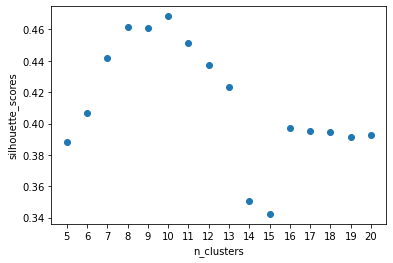

the best value for n_cluster:  10
Wall time: 7.56 s


In [68]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_clustering_scores(train_vectors) -> KMeans:
    """
    This function calculates KMeans model for different values of n_cluster and calculates silhouette score
    for each of them. Then it returns a list of silhouette scores
    RETURNS: 
        list of scores
    """
    # YOUR CODE
    scores=[]
    for i in range(5,21):
        model=KMeans(n_clusters=i,init='random',n_init=10,random_state=SEED)
        model.fit(X)
        y=model.predict(X)
        s_score=silhouette_score(X,y)
        scores.append(s_score)
    return scores

clustering_scores = get_clustering_scores(train_umap)

## plot scores
# YOUR CODE
n_clusters=list()
for i in range(5,21):
    n_clusters.append(i)
    
plt.scatter(n_clusters,clustering_scores)
plt.xlabel("n_clusters")
plt.ylabel("silhouette_scores")
plt.xticks(n_clusters)
plt.show()

## Find best number of clusters
# YOUR CODE
best_cluster_number=n_clusters[clustering_scores.index(max(clustering_scores))]
print("the best value for n_cluster: ",best_cluster_number)

## 4.2. Making a kmeans classifier

Now that we have the best number of clusters, run KMeans again with the best number of clusters associated with the best sihouette score (on `train_umap`). 

After running KMeans you get some number of clusters but each of them have some cluster label that does not necessarily match the trainig labels. Try to implement `get_cluster_mapping` function that inputs your KMeans model and the training labels and returns a dictionary that maps each of the cluster labels to one of the training labels. For example your cluster 0 might correspond to training label of 17.

Hint: In your `get_cluster_mapping` function, find the training label of the majority of data points in each cluster. For example, if your cluster 0 contains 100 data points of label 12 and 5 data points of label 15, the majority of data points in cluster 0 come from label 12. Therefore, your output dictionary should contain the mapping `0: 12`

**4.2.1** show your mapping (resulted dictionary) inside your project report.


In [69]:

# Run KMeans again with best parameter you calculated in the previous section
# YOUR CODE HERE

###
mod=KMeans(n_clusters=best_cluster_number,random_state=SEED)
mod.fit(X)
clustering=mod.predict(X)

def get_cluster_mapping(clustering: KMeans, original_labels):
    """
    input: a clustering and original labels of the data
    returns: a dictionary that maps each cluster number to an original label
    """
    # YOUR CODE HERE
    clust=pd.DataFrame(clustering)
    clust.columns=['a']
    l=clust['a'].unique()
    original_labels=pd.DataFrame(original_labels)
    d=dict()
    for i in l:
        l1=list(clust[clust['a']==i].index)
        df=original_labels.loc[l1]
        df.columns=['a']
        di=dict(df['a'].value_counts())
        d[i]=max(di,key=di.get)
    return d
    
# Feed the generated kmeans clustering and your training labels to the following function
cluster_mapping = get_cluster_mapping(clustering, train_y)
print(cluster_mapping)

{9: 7, 7: 1, 1: 16, 3: 13, 2: 10, 5: 17, 4: 15, 0: 13, 8: 17, 6: 13}


## 4.3. Analyzing clusters

**4.3.1.** Are there any two clusters in your clustering output with the same training label (for example, are there two clusters which both have same training label)? Use your visualizations and describe why?<br>
**4.3.2.** Write the function bellow that returns nearest samples to a cluster center. Use this function and explain why there are overlaps in your labels? <br>
**4.3.3.** Can you infere the overlapping label(s) by checking out most central samples? check with original labels.<br>

In [70]:
#4.3.1
lab=pd.DataFrame(train_y)
lab.columns=['a']
l=list(lab['a'].unique())
cl=pd.DataFrame(clustering)
d_lab=dict()
for i in l:
    x=list(lab[lab['a']==i].index)
    un=cl.loc[x]
    un.columns=['a']
    d_lab[i]=un['a'].unique()
print(d_lab)    #dictionary with key as label and value as overlapping clusters

{7: array([9, 3, 2, 7, 1, 6, 5, 4]), 1: array([7, 5, 1, 9, 3, 0, 2, 4, 6, 8]), 16: array([1, 3, 7, 2, 6, 9, 5]), 13: array([3, 0, 6, 7, 9, 4, 2, 5, 1]), 10: array([2, 9, 3, 1, 4, 7, 5, 6, 8]), 15: array([4, 3, 9, 7, 8, 5, 1, 6, 0, 2]), 17: array([5, 8, 2, 3, 9, 6, 4, 7])}


In [71]:
#4.3.2
from scipy.spatial.distance import cdist

def most_central_samples(clustering: KMeans,newsgroups_train,cluster_id, k=3):
    """
    returns the text of k most central samples in the specified cluster_id
    """
    # YOUR CODE
    center=clustering.cluster_centers_.tolist()[cluster_id]
    dist=cdist(train_umap,[center],metric='euclidean').tolist()
    sorted_dist=sorted(dist,reverse=False)[0:k]   #sort the dist and find least k elements
    samples=list()
    for i in sorted_dist:
        samples.append(newsgroups_train.data[dist.index(i)])
#         samples.append(train_umap[dist.index(i)])
    return samples

center_1=most_central_samples(mod,newsgroups_train,8,3)
center_1

["From: nsmca@aurora.alaska.edu\nSubject: Re: Portable Small Ground Station?dir\nArticle-I.D.: aurora.1993Apr5.185700.1\nOrganization: University of Alaska Fairbanks\nLines: 21\nNntp-Posting-Host: acad3.alaska.edu\n\nIn article <C4zGAM.2nJ@zoo.toronto.edu>, henry@zoo.toronto.edu (Henry Spencer) writes:\n> In article <1993Apr2.214705.1@aurora.alaska.edu> nsmca@aurora.alaska.edu writes:\n>>How difficult would it be to set up your own ground station?\n> \n> Ground station for *what*?  At one extreme, some of the amateur-radio\n> satellites have sometimes been reachable with hand-held radios.  At the\n> other, nothing you can do in your back yard will let you listen in on\n> Galileo.  Please be more specific.\n> -- \n> All work is one man's work.             | Henry Spencer @ U of Toronto Zoology\n>                     - Kipling           |  henry@zoo.toronto.edu  utzoo!henry\n\n\nSPECIFIC:\nBasically to be able to do the things the big dadies can do.. Monitor, and\ncontrol if need be the 

In [72]:
#4.3.3

def most_sample(clustering,train_umap,cluster_id, k=3):
    """
    returns the text of k most central samples in the speci/fied cluster_id
    """
    # YOUR CODE
    center=clustering.cluster_centers_.tolist()[cluster_id]
    dist=cdist(train_umap,[center],metric='euclidean').tolist()
    sorted_dist=sorted(dist,reverse=False)[0:k]   #sort the dist and find least k elements
    samples=list()
    for i in sorted_dist:
        samples.append(train_umap[dist.index(i)])
    return samples


central_1=most_sample(mod,train_umap,2,3000)
central_2=most_sample(mod,train_umap,8,3000)

for i in range(len(central_1)):
    if(central_1[i].tolist()==central_2[i].tolist()):
        print(train_y[np.where(np.all(central_1[i]==train_umap,axis=1))[0][0]])

16


## 4.4. evaluate your kmeans model on test dataset

**4.4.1.** Using the generated mapping, and your clustering model, predict the labels of test dataset (you can use the embeddings of test data that you generated by umap `test_umap`) <br>
**4.4.2.** Calculate the accuracy of model <br>
**4.4.3.** Calculate both micro and macro values of precision, recall and F1 score <br>

In [73]:
# YOUR CODE HERE
#4.4.1
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred=mod.predict(test_umap)
test_predictions=pd.Series(pred).map(cluster_mapping)
test_predictions

0       10
1       13
2       13
3       15
4       15
        ..
2713    13
2714    15
2715    13
2716    13
2717    15
Length: 2718, dtype: int64

In [74]:
#4.4.2
print('Accuracy: {}'.format(accuracy_score(test_predictions,test_y)))

Accuracy: 0.7236938925680647


In [75]:
#4.4.3
prec_macro=precision_score(test_predictions,test_y,average='macro')
prec_micro=precision_score(test_predictions,test_y,average='micro')

recall_macro=recall_score(test_predictions,test_y,average='macro')
recall_micro=recall_score(test_predictions,test_y,average='micro')

f1_macro=f1_score(test_predictions,test_y,average='macro')
f1_micro=f1_score(test_predictions,test_y,average='micro')

print("precision_macro= ",prec_macro)
print("precision_micro= ",prec_micro)
print("recall_macro= ",recall_macro)
print("recall_micro= ",recall_micro)
print("f1_macro= ",f1_macro)
print("f1_micro= ",f1_micro)

precision_macro=  0.7228871229880507
precision_micro=  0.7236938925680647
recall_macro=  0.8019123845888929
recall_micro=  0.7236938925680647
f1_macro=  0.7430058482422243
f1_micro=  0.7236938925680647


# 5.1 KNN classification

Using sklearn `KneighborsClassifier`, classify news data. Then, evaluate your model using the test set.

**5.1.1.** Train two seperate KNN models on both SVD and UMAP embeddings. Use `n_neighbors=100`. <br>
**5.1.2.** Evaluate your model on test datas (`test_umap` and `test_svd`). Which model performs better? Why? <br>
**5.1.3.** Calculate macro and micro precision recall and fscore for `test_umap`. Which one of the two do you prefer for evaluating your model? why? <br>
**5.1.4.** Shortly describe why the two sets of values (macro and micro) are so similar in this case. <br>

In [76]:
#YOUR CODE
#5.1.1 and 5.1.2

#SVD KNN model

from sklearn.neighbors import KNeighborsClassifier

n_svd=KNeighborsClassifier(n_neighbors=100)
n_svd.fit(train_svd,train_y)
svd_pred=n_svd.predict(test_svd)

n_umap=KNeighborsClassifier(n_neighbors=100)
n_umap.fit(train_umap,train_y)
umap_pred=n_umap.predict(test_umap)

print('Accuracy for SVD: {}'.format(accuracy_score(svd_pred,test_y)))
print('Accuracy for UMAP: {}'.format(accuracy_score(umap_pred,test_y)))

Accuracy for SVD: 0.46688741721854304
Accuracy for UMAP: 0.7818248712288447


In [77]:
#5.1.3
prec_macro_umap=precision_score(umap_pred,test_y,average='macro')
prec_micro_umap=precision_score(umap_pred,test_y,average='micro')

recall_macro_umap=recall_score(umap_pred,test_y,average='macro')
recall_micro_umap=recall_score(umap_pred,test_y,average='micro')

f1_macro_umap=f1_score(umap_pred,test_y,average='macro')
f1_micro_umap=f1_score(umap_pred,test_y,average='micro')

print("precision_macro_umap= ",prec_macro_umap)
print("precision_micro_umap= ",prec_micro_umap)
print("recall_macro_umap= ",recall_macro_umap)
print("recall_micro_umap= ",recall_micro_umap)
print("f1_macro_umap= ",f1_macro_umap)
print("f1_micro_umap= ",f1_micro_umap)

precision_macro_umap=  0.7816578088533674
precision_micro_umap=  0.7818248712288447
recall_macro_umap=  0.7903411972533079
recall_micro_umap=  0.7818248712288447
f1_macro_umap=  0.7817641822359045
f1_micro_umap=  0.7818248712288447
